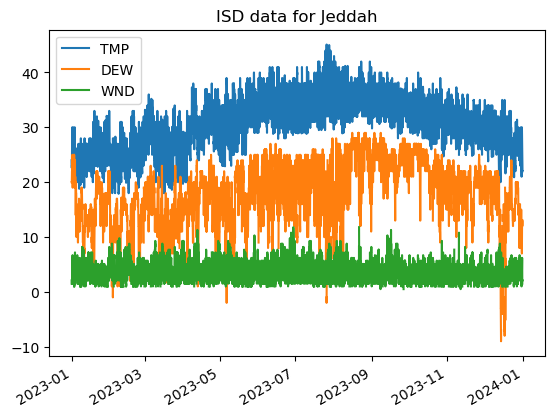

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import os
import tools

#Read data and plot
df_isd = tools.read_isd_csv('/mnt/datawaha/hyex/wangx0o/research/Course/ErSE394/assignment3.csv')
plot = df_isd.plot(title="ISD data for Jeddah")
plt.show()

In [3]:
#Calculate RH, HI, and find max values
df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values,df_isd['TMP'].values)
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

print(df_isd.max())
print(df_isd.idxmax()) 
print(df_isd.loc[["2023-08-21 10:00:00"]])

TMP     45.100000
DEW     29.000000
WND     11.800000
RH     100.000000
HI      55.259491
dtype: float64
TMP   2023-07-26 09:00:00
DEW   2023-08-16 01:00:00
WND   2023-06-29 11:00:00
RH    2023-01-02 22:00:00
HI    2023-08-21 10:00:00
dtype: datetime64[ns]
                      TMP   DEW  WND         RH         HI
2023-08-21 10:00:00  38.0  29.0  5.7  60.427012  55.259491


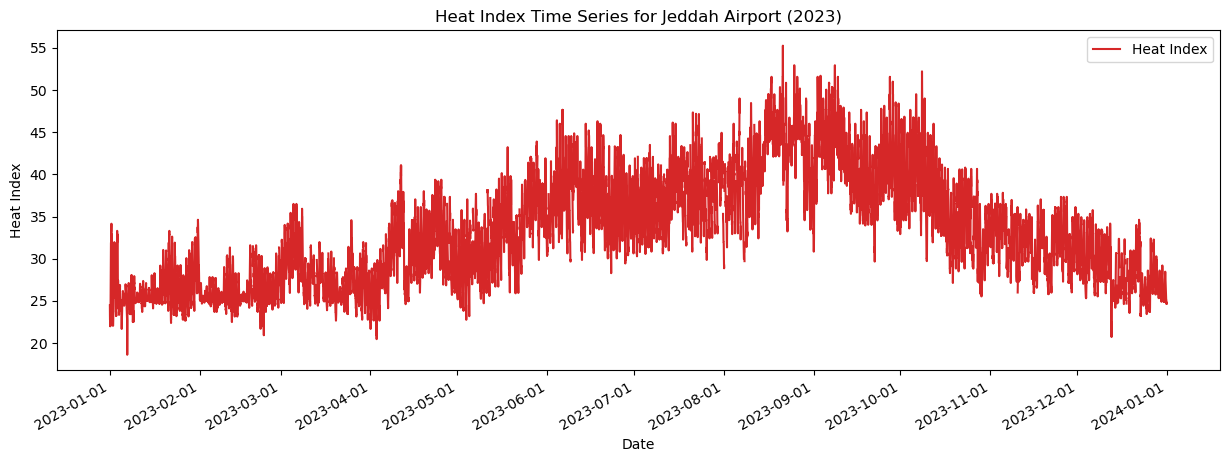

In [9]:
#Making time-series plot and save
folder_path = '/mnt/datawaha/hyex/wangx0o/research/Course/ErSE394/assignment_3'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df_isd.index = pd.to_datetime(df_isd.index)

plt.figure(figsize=(15, 5))  
plt.plot(df_isd.index, df_isd['HI'], label='Heat Index', color='tab:red')  
plt.title('Heat Index Time Series for Jeddah Airport (2023)')  
plt.xlabel('Date')  
plt.ylabel('Heat Index') 
plt.legend()  

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gcf().autofmt_xdate()  # 
plt.savefig(os.path.join(folder_path, 'heat_index_timeseries_jeddah_2023.png'), dpi=300)
plt.show()  


In [17]:
#Calculate the highest HI value with the additional warming
df_isd = tools.read_isd_csv('/mnt/datawaha/hyex/wangx0o/research/Course/ErSE394/assignment3.csv')
df_isd['TMP'] = df_isd['TMP'] + 3

df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values,df_isd['TMP'].values)
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

print(df_isd.max())



TMP    48.100000
DEW    29.000000
WND    11.800000
RH     83.796297
HI     59.293985
dtype: float64
